In [26]:
import numpy as np
import math
from functools import partial
import matplotlib.pyplot as plt
from typing import Callable

# Последовательность независимых испытаний Бернулли
Прочитайте Гнеденко. Курс теории вероятности. Главу 2. Последовательность независимых испытаний.

## Формула Бернулли
$$
P_n(m) = C_n^m p^m q^{n-m}
$$
Описывает вероятность наступления $m$ событий $A$ при $n$ испытаниях, когда возможны только два события $A$ и $\overline{A}$, и $P(A) = p$.

**Например** при 50 подбрасываний монетки мы хотим найти вероятность выпадения $m$ орлов - она равна $P_{50}(m)$.

**Еще пример**:  
Вероятность изделию некоторого производства оказаться бракованным равна 0.005. Чему равна вероятность того, что из 10000 наудачу взятых изделий бракованных изделий окажется не более 70?.  
Ответ: $P\{\mu \leq 70\} = \sum_{m=0}^{70} P_n(m)$


In [27]:
comb50: Callable = partial(math.comb, 50)

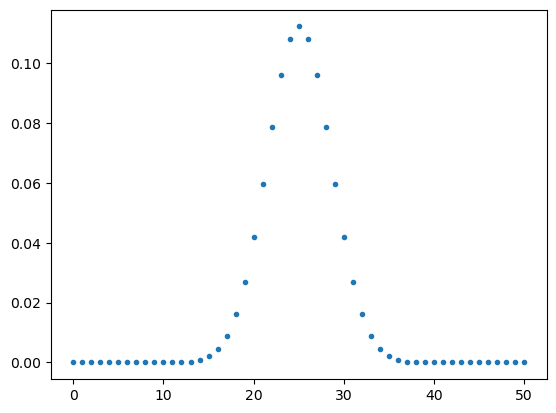

In [25]:
x:list[int] = list(range(0,51))
plt.plot(x, list(map(lambda x: x/(2**50), map(comb50, x))), '.')

In [28]:
x1:list[int] = list(range(0,20)) + list(range(31,51))
x2:list[int] = list(range(20,31))
sum(list(map(lambda x: x/(2**50), map(comb50, x2))))/sum(list(map(lambda x: x/(2**50), map(comb50, x1))))

7.408982462459107

Оценить $P_n(m)$ при больших $n$ и $p$ не близких к  $1$ или $0$ можно по формуле **Муавра**: 
$$
P_n(m) \sim \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}\big(\frac{m - np}{\sqrt{npq}}\big)^2}
$$

Если же $p$ близка к 1 или 0 то лучше использовать формулу:
$$
P_n(m) \sim \frac{(np)^m}{m!}e^{-np}
$$
Последнюю формулу еще называют распределением **Пуассона**  

для вычисления факториала используйте формулу **Стирлинга** 
$$
n! \sim \sqrt{2\pi n}\Big(\frac{n}{e}\Big)^n
$$

In [85]:
def st(n:int, p:float, q:float, m:int) -> float:
    return np.e**(-(((m - n*p)/np.sqrt(n*p*q))**2)/2)/(np.sqrt(2*np.pi*n*p*q))

n:int = 50
p:float = 0.5
st50: Callable = partial(st, n, p, 1-p)

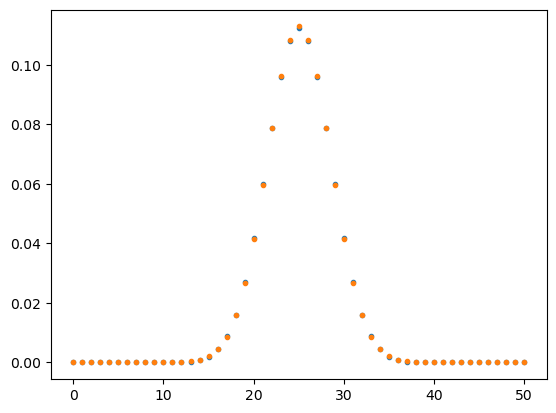

In [86]:
m:list[int] = list(range(0,n+1))
plt.plot(x, list(map(lambda t: t[0]*p**t[1]*(1-p)**(n-t[1]), map(lambda m: (comb50(m), m), m))), '.')
plt.plot(x, list(map(lambda x: x, map(st50, m))), '.')

# ДЗ

dz241019/

**main.ipynb**
Решение задач запишите в юпитер ноутбук. Каждая задача должна начинаться **заголовком** "Задача " и дальше номер задачи, например "Задача 1".

1. Приблизить $P_n(m)$ для $p$ близких к нулю и нарисовать график, аналогичный графику сверху, где была бы видна разница между точным и приближенном значении.

2. Для n = 50 определите, начиная с какого p формула для малых p точнее приближает $P_n(m)$ чем формула Муавра. Для этого Найдите для каждого значения m разницу между приближенным значением и точным, возьмите среднее этой разницы вы получите среднюю оценку ошибки. И сравните средние ошибки формулы Муавра и формулы для малых p для каждого значения p от 0.5 до 0.01 с шагом 0.01. На одном графике выведите эти значения для наглядности: средние ошибки от p.

3. В некотором семействе имеется 10 детей. Считая вероятности рождения
мальчика и девочки равными 1/2, найти вероятность того, что в семействе
а) 5 мальчиков и 5 девочек;
б) число мальчиков заключается между 3 и 8.

4. В обществе, состоящем из 4 человек, дни рождения трех приходятся
на один месяц, а четвертого — на один из остальных одиннадцати. Считая
вероятность рождения в течение каждого из месяцев для каждого лица равной
1/12, найти вероятность того, что
а) указанные три лица родились в январе, а четвертое лицо в октябре;
б) три лица родились в каком-то одном месяце, а четвертое в каком-то из 
остальных одиннадцати.

5. Известно, что вероятность выпуска сверла повышенной хрупкости (брак)
равна 0,02. Сверла укладываются в коробки по 100 штук. Чему равна вероятность
того, что
а) в коробке не окажется бракованных сверл;
б) число бракованных сверл окажется не более 3;
в) сколько нужно класть в коробку сверл, чтобы с вероятностью, не меньшей
0,9, в ней было не менее 100 исправных?
Указание. Воспользоваться распределением Пуассона.

6. В страховом обществе застраховано 10 000 лиц одного возраста и одной
социальной группы. Вероятность смерти в течение года для каждого лица равна
0,006. Каждый застрахованный вносит 1 января 12 руб. страховых и в случае
смерти его родственники получают от общества 1000 руб. Чему равна вероятность
того, что
а) общество потерпит убытки;
б) получит прибыль, не меньшую 40000, 60000, 80000 руб.?

7. (Необязательная задача)
Задача Банаха. Некий математик носит с собой две коробки спичек.
Каждый раз, когда он хочет достать спичку, он выбирает наугад одну из коробок.
Найти вероятность того, что когда математик вынет пустую коробку, в другой
коробке окажется г спичек (г = 0,1,2, ...,n; n — число спичек, бывших
первоначально в каждой из коробок).